---
title: "Color space conversion"
description: "In this tutorial we are going to learn how to convert image from different color spaces using `kornia.color`."
author:
    - "Edgar Riba"
date: 03-18-2021
categories:
    - Basic
    - Color spaces
    - kornia.color
---

<a href="https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/nbs/color_conversions.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in google colab"></a>

In [ ]:
%%capture
!pip install kornia
!pip install kornia-rs

## Explanation

Images are asumed to be loaded either in RGB or Grayscale space.

1.   We will use OpenCV to load images.
2.   Convert from BGR to RGB (note that OpenCV loads images in BGR format).



In [ ]:
import io

import requests


def download_image(url: str, filename: str = "") -> str:
    filename = url.split("/")[-1] if len(filename) == 0 else filename
    # Download
    bytesio = io.BytesIO(requests.get(url).content)
    # Save file
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())

    return filename


url = "https://github.com/kornia/data/raw/main/simba.png"
download_image(url)

'simba.png'

In [ ]:
import kornia as K
import numpy as np
import torch
import torchvision
from matplotlib import pyplot as plt

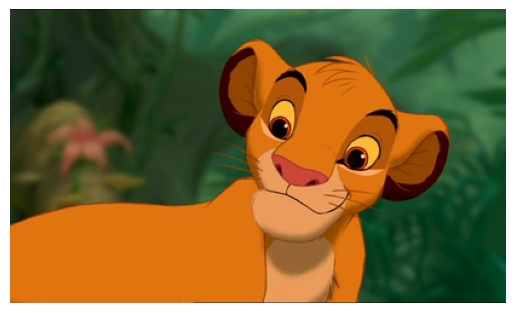

In [ ]:
# read the image with Kornia
img_tensor = K.io.load_image("simba.png", K.io.ImageLoadType.RGB32)  # CxHxW
img_array = K.tensor_to_image(img_tensor)

plt.axis("off")
plt.imshow(img_array)
plt.show()

Alternatively we can use use `kornia.color` to perform the color transformation.

1.   Convert the tensor to RGB
2.   Convert back the tensor to numpy for visualisation.

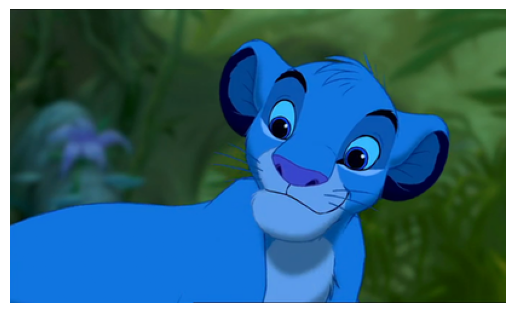

In [ ]:
x_rgb: torch.Tensor = img_tensor

# to BGR
x_bgr: torch.Tensor = K.color.rgb_to_bgr(x_rgb)

# convert back to numpy and visualize
img_np: np.array = K.tensor_to_image(x_bgr)
plt.imshow(img_np)
plt.axis("off");

Using `kornia` we easily perform color transformation in batch mode.

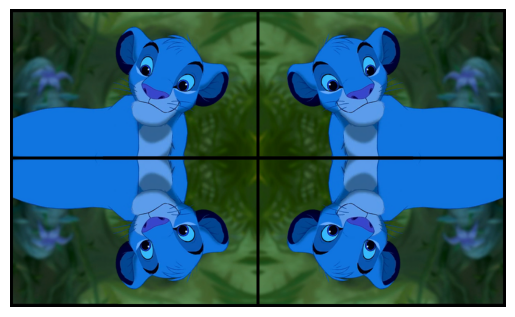

In [ ]:
def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2, padding=5)
    out_np: np.array = K.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis("off")
    plt.show()


# create a batch of images
xb_bgr = torch.stack([x_bgr, K.geometry.hflip(x_bgr), K.geometry.vflip(x_bgr), K.geometry.rot180(x_bgr)])
imshow(xb_bgr)

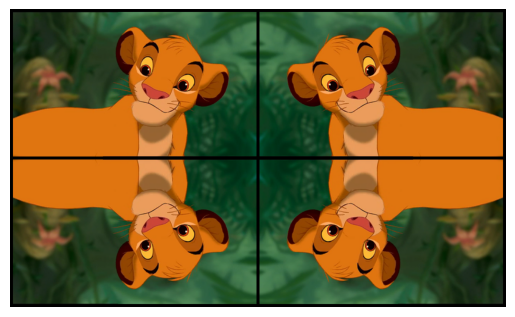

In [ ]:
# convert to back to RGB
xb_rgb = K.color.bgr_to_rgb(xb_bgr)
imshow(xb_rgb)

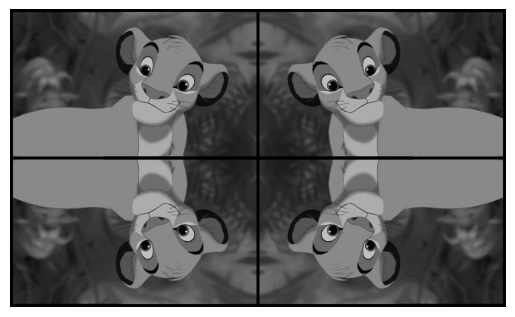

In [ ]:
# convert to grayscale
# NOTE: image comes in torch.uint8, and kornia assumes floating point type
xb_gray = K.color.rgb_to_grayscale(xb_rgb)
imshow(xb_gray)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


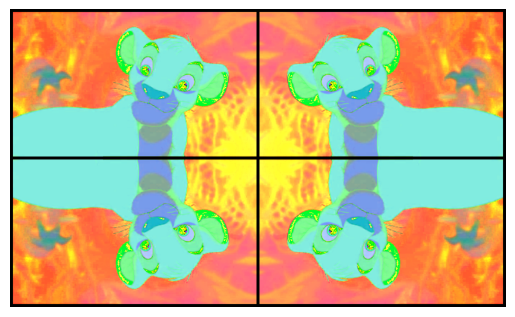

In [ ]:
# convert to HSV
xb_hsv = K.color.rgb_to_hsv(xb_rgb)
imshow(xb_hsv)